In [115]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [116]:
print(torch.cuda.is_available())

True


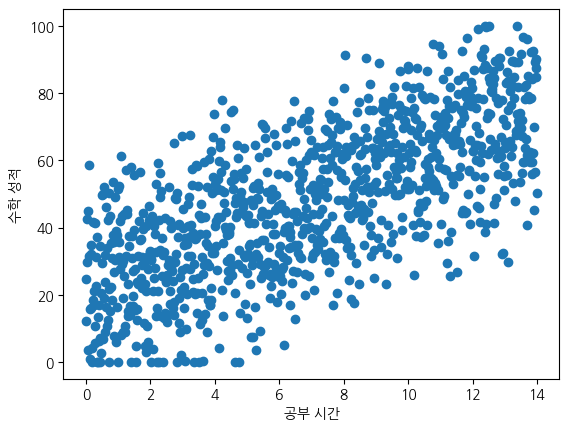

In [117]:
# 데이터 준비
data = pd.read_csv('수학 성적.csv')
x_data = data['공부 시간']
y_data = data['수학 성적']

# 그래프 생성
plt.scatter(x_data, y_data)

# 라벨 설정
plt.xlabel('공부 시간')
plt.ylabel('수학 성적')

# 그래프 표시
plt.show()

In [118]:
# '공부 시간' 칼럼 데이터
x_data = torch.tensor(data['공부 시간'].to_numpy())

# '수학 성적' 칼럼 데이터
y_data = torch.tensor(data['수학 성적'].to_numpy())

# 데이터 확인
print(f'x_data: {x_data}')
print(f'y_data: {y_data}')

x_data: tensor([ 0.0000,  0.0140,  0.0280,  0.0420,  0.0561,  0.0701,  0.0841,  0.0981,
         0.1121,  0.1261,  0.1401,  0.1542,  0.1682,  0.1822,  0.1962,  0.2102,
         0.2242,  0.2382,  0.2523,  0.2663,  0.2803,  0.2943,  0.3083,  0.3223,
         0.3363,  0.3504,  0.3644,  0.3784,  0.3924,  0.4064,  0.4204,  0.4344,
         0.4484,  0.4625,  0.4765,  0.4905,  0.5045,  0.5185,  0.5325,  0.5465,
         0.5606,  0.5746,  0.5886,  0.6026,  0.6166,  0.6306,  0.6446,  0.6587,
         0.6727,  0.6867,  0.7007,  0.7147,  0.7287,  0.7427,  0.7568,  0.7708,
         0.7848,  0.7988,  0.8128,  0.8268,  0.8408,  0.8549,  0.8689,  0.8829,
         0.8969,  0.9109,  0.9249,  0.9389,  0.9530,  0.9670,  0.9810,  0.9950,
         1.0090,  1.0230,  1.0370,  1.0511,  1.0651,  1.0791,  1.0931,  1.1071,
         1.1211,  1.1351,  1.1491,  1.1632,  1.1772,  1.1912,  1.2052,  1.2192,
         1.2332,  1.2472,  1.2613,  1.2753,  1.2893,  1.3033,  1.3173,  1.3313,
         1.3453,  1.3594,  1.373

In [119]:
x_data = x_data.to(torch.float32)
y_data = y_data.to(torch.float32)
# 데이터 확인
print(f'x_data: {x_data}')
print(f'y_data: {y_data}')

x_data: tensor([ 0.0000,  0.0140,  0.0280,  0.0420,  0.0561,  0.0701,  0.0841,  0.0981,
         0.1121,  0.1261,  0.1401,  0.1542,  0.1682,  0.1822,  0.1962,  0.2102,
         0.2242,  0.2382,  0.2523,  0.2663,  0.2803,  0.2943,  0.3083,  0.3223,
         0.3363,  0.3504,  0.3644,  0.3784,  0.3924,  0.4064,  0.4204,  0.4344,
         0.4484,  0.4625,  0.4765,  0.4905,  0.5045,  0.5185,  0.5325,  0.5465,
         0.5606,  0.5746,  0.5886,  0.6026,  0.6166,  0.6306,  0.6446,  0.6587,
         0.6727,  0.6867,  0.7007,  0.7147,  0.7287,  0.7427,  0.7568,  0.7708,
         0.7848,  0.7988,  0.8128,  0.8268,  0.8408,  0.8549,  0.8689,  0.8829,
         0.8969,  0.9109,  0.9249,  0.9389,  0.9530,  0.9670,  0.9810,  0.9950,
         1.0090,  1.0230,  1.0370,  1.0511,  1.0651,  1.0791,  1.0931,  1.1071,
         1.1211,  1.1351,  1.1491,  1.1632,  1.1772,  1.1912,  1.2052,  1.2192,
         1.2332,  1.2472,  1.2613,  1.2753,  1.2893,  1.3033,  1.3173,  1.3313,
         1.3453,  1.3594,  1.373

In [120]:
x_data = torch.reshape(x_data, (-1, 1))
y_data = torch.reshape(y_data, (-1, 1))

In [121]:
print(x_data.shape)
print(y_data.shape)

torch.Size([1000, 1])
torch.Size([1000, 1])


In [122]:
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super().__init__() # torch.nn.Module 의 __init__ 메소드 호출
        self.linear = torch.nn.Linear(1, 1)  # 입력 차원 1, 출력 차원 1

    def forward(self, x):
        return self.linear(x)

In [123]:
# 모델 생성
model = LinearRegression()

In [124]:
from sklearn.model_selection import train_test_split

# 학습 전 데이터 스케일링
x_mean = x_data.mean()
x_std = x_data.std()

y_mean = y_data.mean()
y_std = y_data.std()

x_data = (x_data - x_mean) / x_std
y_data = (y_data - y_mean) / y_std

# 데이터를 학습 세트와 테스트 세트로 분리 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# 손실 함수 정의
criterion = torch.nn.MSELoss()  # 평균 제곱 오차 손실

# 최적화 알고리즘 정의
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [125]:
# loss 저장
loss_history = []

# 예측값 저장
y_preds = []

epochs = 10

# 모델 학습
model.train()
for epoch in range(epochs):
    # 예측
    y_pred = model(X_train)
    y_preds.append(y_pred)

    # 손실 계산
    loss = criterion(y_pred, y_train)
    loss_history.append(loss.item())
    # 모델 업데이트
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 100번마다 출력
    if epoch % 2 == 0:
        print(f'Epoch {epoch + 1}: Loss {loss.item()}')

Epoch 1: Loss 0.9699681997299194
Epoch 3: Loss 0.6942207217216492
Epoch 5: Loss 0.5821557641029358
Epoch 7: Loss 0.5366111993789673
Epoch 9: Loss 0.5181009769439697


In [126]:
y_preds

[tensor([[ 2.1434e-02],
         [ 5.9108e-01],
         [ 7.7120e-01],
         [ 6.1584e-01],
         [ 9.2994e-01],
         [ 6.5975e-01],
         [ 1.7454e-01],
         [ 1.0223e+00],
         [ 5.4605e-01],
         [ 9.1643e-01],
         [ 6.1962e-02],
         [ 1.4752e-01],
         [ 1.0301e+00],
         [ 9.1980e-01],
         [ 7.2617e-01],
         [ 3.6142e-01],
         [ 7.3630e-01],
         [ 2.6910e-01],
         [ 1.0099e+00],
         [ 7.8584e-01],
         [ 3.3215e-01],
         [ 8.1511e-01],
         [ 1.0864e+00],
         [ 4.3949e-02],
         [ 9.9748e-01],
         [-8.9623e-03],
         [ 6.0121e-01],
         [ 3.8281e-01],
         [ 1.0065e+00],
         [ 5.9220e-01],
         [ 3.7605e-01],
         [ 1.1078e+00],
         [ 5.3029e-01],
         [ 6.3611e-01],
         [ 2.5937e-02],
         [ 2.3685e-02],
         [ 2.4884e-01],
         [ 1.0729e+00],
         [ 2.0494e-01],
         [ 3.6367e-01],
         [-7.8365e-03],
         [ 2.184

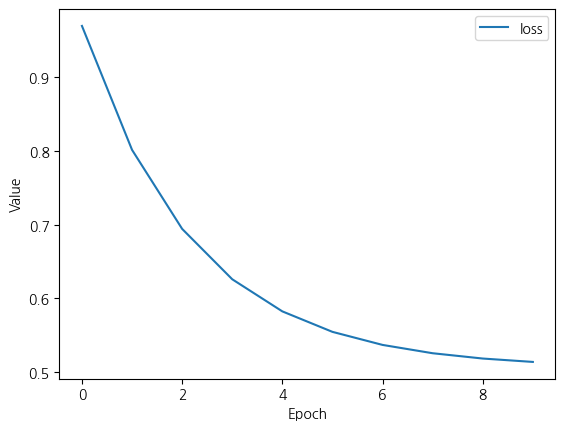

In [127]:
import matplotlib.pyplot as plt

# 예측값 그래프
plt.plot(loss_history, label='loss')

plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

In [138]:
# 새로운 공부 시간 입력
study_time = X_test[0]
study_time_rescaled = study_time * x_std + x_mean
print(study_time_rescaled)

# 모델 예측
model.eval()
with torch.no_grad():
    print("실제 성적", y_test[0] * y_std + y_mean)
    # 예측
    y_pred = model(study_time)
    y_pred_rescaled = y_pred * y_std + y_mean

    # 결과 출력
    print(f'공부 시간 {study_time_rescaled.item()}일 때 예상 수학 성적: {y_pred_rescaled.item()}')

tensor([7.3013])
실제 성적 tensor([54.1297])
공부 시간 7.3013014793396일 때 예상 수학 성적: 50.232051849365234
